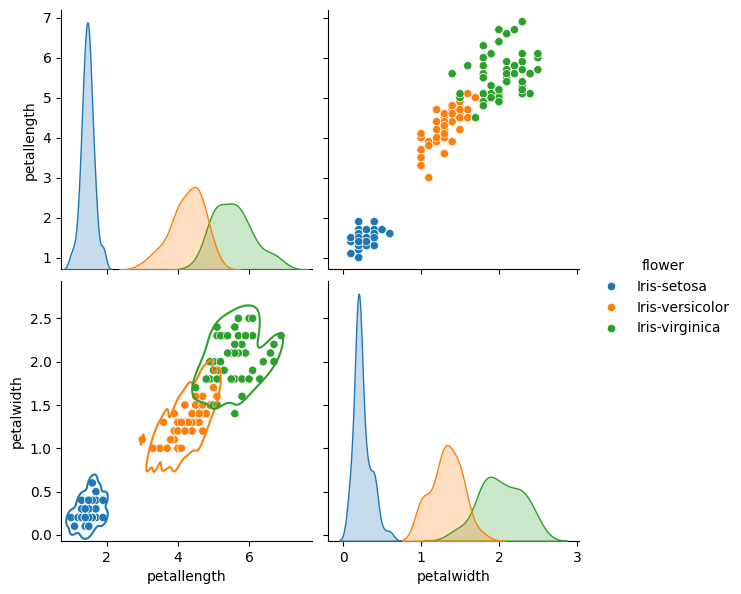

In [17]:
import numpy
import pandas
import tensorflow
import keras
from matplotlib import pyplot
import seaborn


# CLASSIFIER PARAMETERS
my_vars = ['petallength', 'petalwidth']
classification_col = 'flower'
my_class = 'Iris-virginica'
my_loss = 'mse' # 'mse', 'binary_crossentropy' = mean square error 
my_metrics = ['Accuracy'] # 'Accuracy', 'Precision', 'Recall'
learning_rate = 0.01 # 0.01, 0.001  (quanto menor, mais tempo vai demorar, mas talvez tenha mais precisao)
my_epochs = 100 #quantidade de iteracoes
validation_split = 0.15 # 0.25, 0.33  (fracao dos dados de treinamento para serem usados para validacao)

# SELECTION FROM IRIS DATAFRAME
my_vars_w_class = my_vars.copy()
my_vars_w_class.append(classification_col)

iris = pandas.read_csv('datasets/iris.data', sep=',', decimal='.')

iris = iris[my_vars_w_class]

g = seaborn.pairplot(iris, hue='flower', height=3, diag_kind='kde')
_ = g.map_lower(seaborn.kdeplot, levels=1, color=".2")

In [18]:
#X: apenas as propriedades de entrada no formato NUMPY (matriz)
X = iris[my_vars].to_numpy()
#Y: Transforma o array de strings em array de ints, 0 se for diferente da classe , 1 se for igual
Y = (iris['flower'] == my_class).astype(int).to_numpy()[:, numpy.newaxis]

inputs = keras.Input(shape=(len(my_vars), ))
#inicializando o Keras com uma camada simples de neuronio 
outputs = keras.layers.Dense(1, activation='sigmoid')(inputs)
model_name = f'{my_class}_classifier'
my_net = keras.Model(inputs=inputs, outputs=outputs, name=model_name)
my_net.summary()



Model: "Iris-virginica_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Treinando o modelo. Os dois otimizadores mais comuns sao o RMSProp e o ADAM :
# optimizer = tensorflow.keras.optimizers.RMSProp(learning_rate=lr)
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate)
my_net.compile(optimizer=optimizer, loss=my_loss, metrics=my_metrics)
history = my_net.fit(X, Y, batch_size=X.shape[0], epochs=my_epochs, validation_split=validation_split, verbose=1) # , callbacks=[es])
#val_metrica eh o percentual de uma determinada metrica encima do grupo de validacao
#metrica eh a metrica encima do grupo de teste


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step - Accuracy: 0.7874 - loss: 0.1653 - val_Accuracy: 0.0000e+00 - val_loss: 0.3439
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - Accuracy: 0.7874 - loss: 0.1645 - val_Accuracy: 0.0000e+00 - val_loss: 0.3517
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - Accuracy: 0.7874 - loss: 0.1637 - val_Accuracy: 0.0000e+00 - val_loss: 0.3600
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - Accuracy: 0.7874 - loss: 0.1629 - val_Accuracy: 0.0000e+00 - val_loss: 0.3633
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - Accuracy: 0.7874 - loss: 0.1621 - val_Accuracy: 0.0000e+00 - val_loss: 0.3607
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - Accuracy: 0.7874 - loss: 0.1613 - val_Accuracy: 0.0000e+00 - val_loss: 0.3546
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - Accuracy: 0.7874 - loss: 0.1605 - val_Accuracy: 0.0000e+00 - val_loss: 0.3473
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - Accuracy: 0.7874 - loss: 0.1597 - val